# Baseball Case Study

Data from 2014 Major League Baseball seasons.
To develop an algorithm that predicts the number of wins for a given team in the 2015 season.
A linear regression approach.

In [73]:
#import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#load dataset
bb= pd.read_csv('baseball.csv')
bb

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [75]:
#Rename Column names for ease in further working with dataset.
bb.rename(columns={ 'R' : 'Runs', 'AB' : 'At Bats', 
 'H' : 'Hits','2B' : 'Doubles','3B' : 'Triples','HR' : 'Homeruns','BB' : 'walk-to-strikeout','W' : 'Walks','SO' : 'Strikeouts',
 'SB' : 'Stolen Bases','RA' : 'Runs Allowed','ER' : 'Earned Runs','ERA' : 'Earned Run Average (ERA)','CG' : 'wins',
'SHO' : 'Shutouts','SV' : 'Saves','E' : 'Errors'}, inplace=True)

In [76]:
#Baseball dataset
bb

,Walks,Runs,At Bats,Hits,Doubles,Triples,Homeruns,walk-to-strikeout,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),wins,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [77]:
#dataset basic info
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Walks                     30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   walk-to-strikeout         30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  wins                      30 non-null     int64  
 14  Shutouts    

In [78]:
#statistical insights
bb.describe()

,Walks,Runs,At Bats,Hits,Doubles,Triples,Homeruns,walk-to-strikeout,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),wins,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [79]:
#corelation
bb.corr()

,Walks,Runs,At Bats,Hits,Doubles,Triples,Homeruns,walk-to-strikeout,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),wins,Shutouts,Saves,Errors
Walks,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
walk-to-strikeout,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


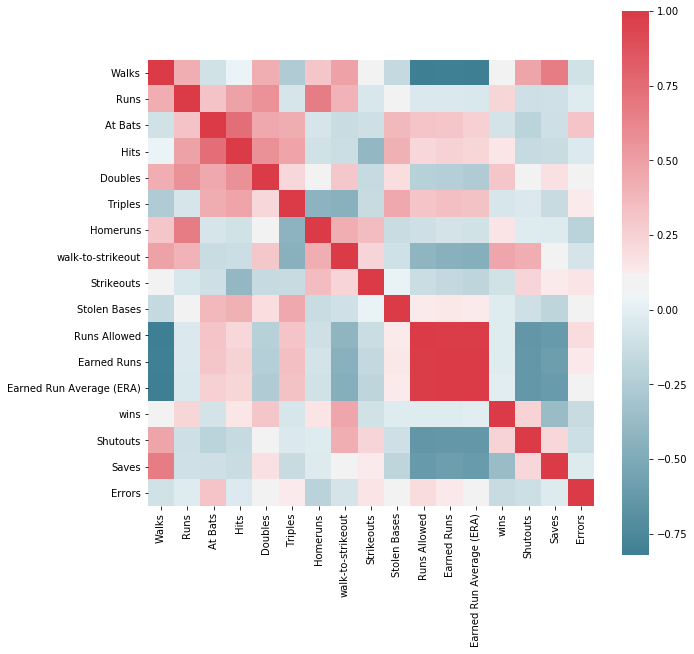

In [80]:
#corelation between varios attributes of baseball dataset.
corr = bb.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            square=True, ax=ax)

In [81]:
bb.columns

Index(['Walks', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'walk-to-strikeout', 'Strikeouts', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average (ERA)', 'wins', 'Shutouts', 'Saves',
       'Errors'],
      dtype='object')

Text(0.5, 1.0, 'histogram of wins')

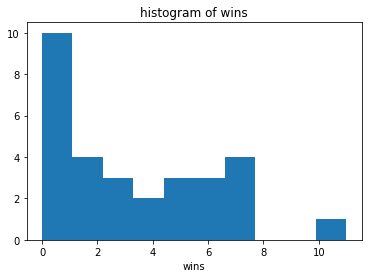

In [82]:
plt.hist(bb['wins'])
plt.xlabel('wins')
plt.title('histogram of wins')

the average wins: 3.466666666666667


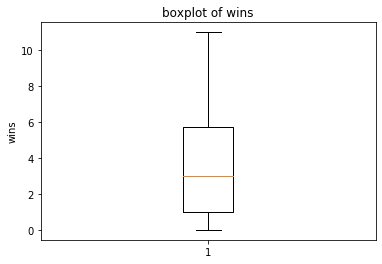

In [83]:
plt.boxplot(bb['wins'])
plt.ylabel('wins')
plt.title('boxplot of wins')
print('the average wins:',bb['wins'].mean())

Text(0.5, 0, 'runs allowed')

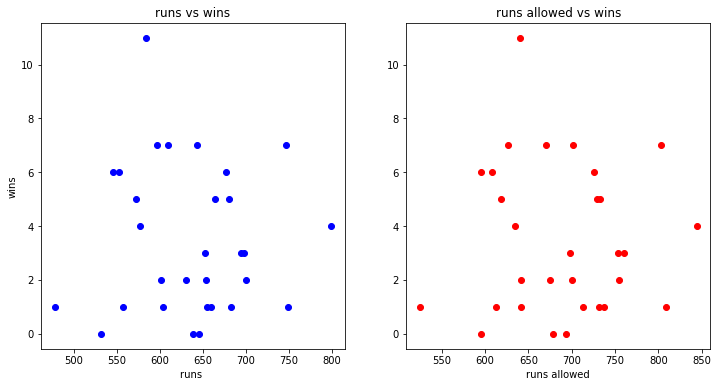

In [84]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(bb['Earned Runs'],bb['wins'],c='blue')
ax1.set_title('runs vs wins')
ax1.set_ylabel('wins')
ax1.set_xlabel('runs ')

ax2.scatter(bb['Runs Allowed'],bb['wins'],c='red')
ax2.set_title('runs allowed vs wins')
ax2.set_xlabel('runs allowed')


Scattering dots of both runs earned and runs allowed graph are almost identical wrt to wins.

In [85]:
bb.corr()['wins']

Walks                       0.080533
Runs                        0.232042
At Bats                    -0.080876
Hits                        0.147955
Doubles                     0.306675
Triples                    -0.065898
Homeruns                    0.156502
walk-to-strikeout           0.462478
Strikeouts                 -0.093418
Stolen Bases               -0.020783
Runs Allowed               -0.016659
Earned Runs                -0.020221
Earned Run Average (ERA)   -0.009856
wins                        1.000000
Shutouts                    0.241676
Saves                      -0.367766
Errors                     -0.140047
Name: wins, dtype: float64

Hits & doubles are highly positively corelated to wins and saves is highly negatively corelated to wins. 

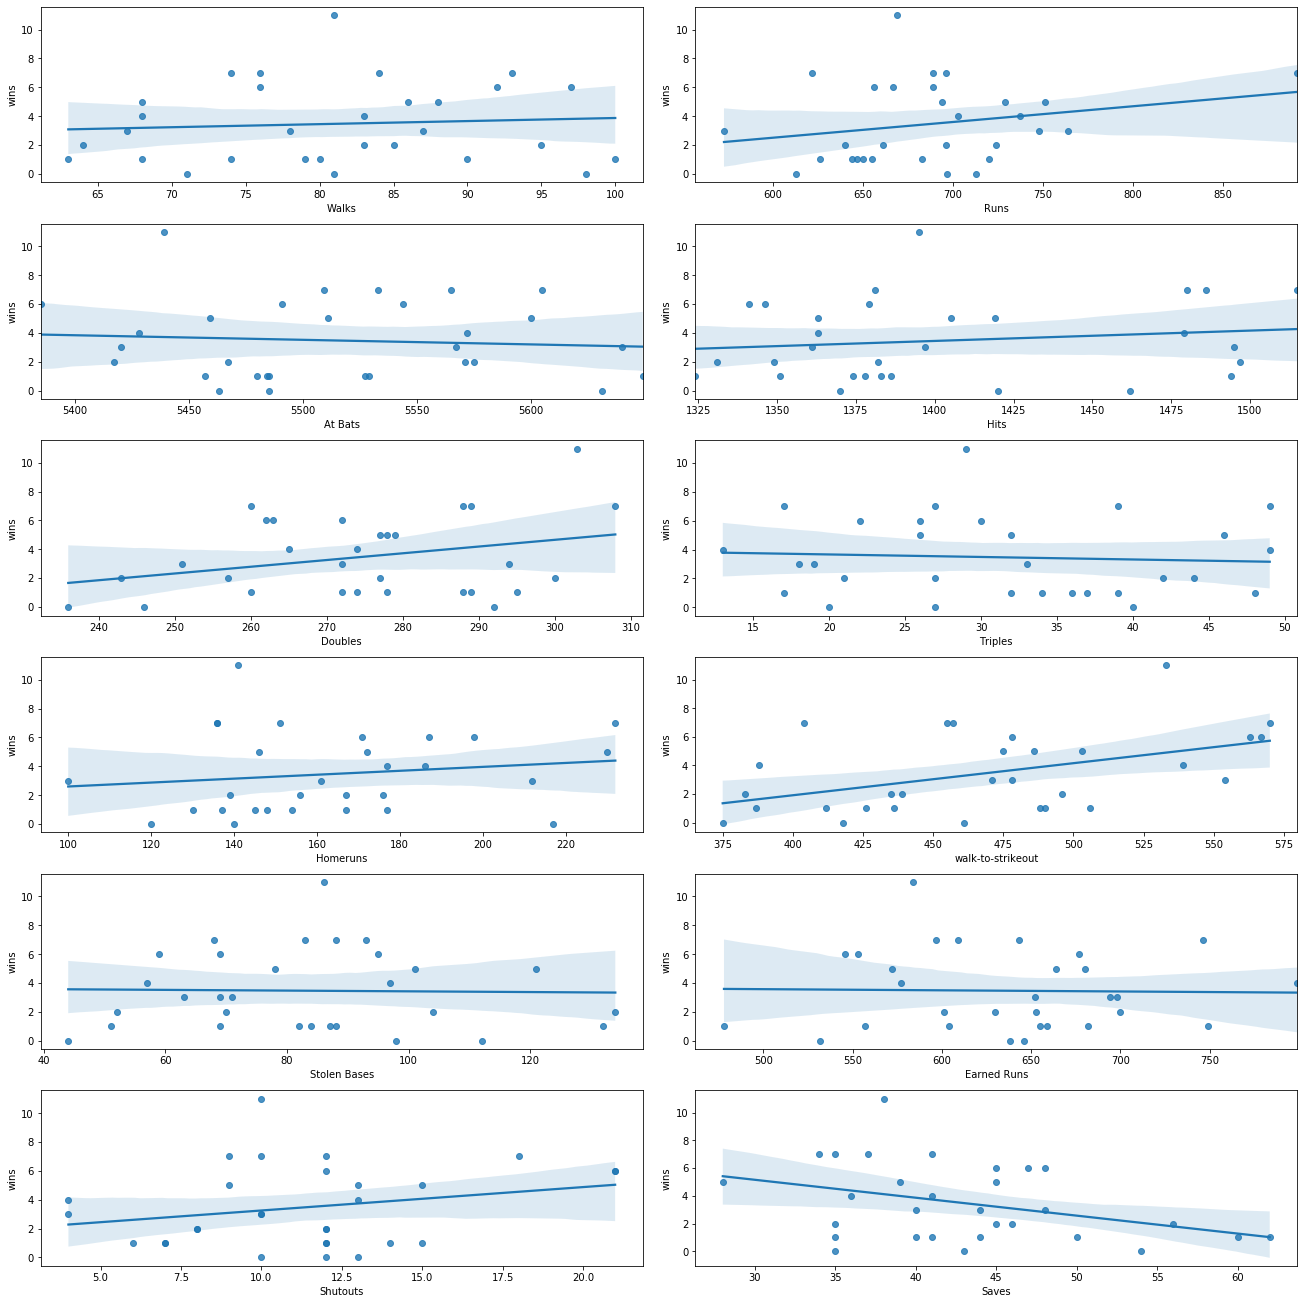

In [86]:
#relation between wins for each attribute.
fig, axes = plt.subplots(nrows=6, ncols=2,constrained_layout=True,figsize=(18,18))

sns.regplot(x='Walks',y='wins',data=bb,ax=axes[0,0])

sns.regplot(x='Runs' ,y='wins',data=bb,ax=axes[0,1])

sns.regplot(x='At Bats' ,y='wins',data=bb,ax=axes[1,0])

sns.regplot(x='Hits' ,y='wins',data=bb,ax=axes[1,1])

sns.regplot(x='Doubles' ,y='wins',data=bb,ax=axes[2,0])

sns.regplot(x='Triples' ,y='wins',data=bb,ax=axes[2,1])

sns.regplot(x='Homeruns' ,y='wins',data=bb,ax=axes[3,0])

sns.regplot(x='walk-to-strikeout' ,y='wins',data=bb,ax=axes[3,1])

sns.regplot(x='Stolen Bases' ,y='wins',data=bb,ax=axes[4,0])

sns.regplot(x='Earned Runs' ,y='wins',data=bb,ax=axes[4,1])

sns.regplot(x='Shutouts' ,y='wins',data=bb,ax=axes[5,0])

sns.regplot(x='Saves' ,y='wins',data=bb,ax=axes[5,1])


In [87]:
#lets chcek the skewness in the dataset
print(bb.skew())
print("Total count of numeric features: ",len(bb.skew()))
print("count of features which are significantly skewed: ",len(bb.skew().loc[abs(bb.skew())>0.5]))

Walks                       0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
walk-to-strikeout           0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
wins                        0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  7


In [88]:
#lets treat the skewness in dataset
import numpy as np
for index in bb.skew().index:
    if bb.skew().loc[index]>0.5:
        bb[index]=np.log1p(bb[index])
    if bb.skew().loc[index]<-0.5:
        bb[index]=np.square(bb[index])

In [89]:
#Lets again check the skewness
print(bb.skew())
print("Total count of numeric features: ",len(bb.skew()))
print("count of features which are significantly skewed: ",len(bb.skew().loc[abs(bb.skew())>0.5]))
#Based on below o/p we can say we have reduced significantly skewed features from 7 to 3

Walks                       0.047089
Runs                        0.744813
At Bats                     0.183437
Hits                        0.628584
Doubles                    -0.230650
Triples                     0.129502
Homeruns                   -0.009528
walk-to-strikeout           0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
wins                       -0.325962
Shutouts                   -0.093545
Saves                       0.163057
Errors                      0.632916
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  3


In [90]:
#Spliting dataset into train_set and test_set
#lets seprate the input and output column

df_x=bb.drop(columns=["wins"])
y=bb[["wins"]]

In [91]:
#preprocess.
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df_x=scaler.fit_transform(df_x)
scaled_y=scaler.fit_transform(y)
X=scaled_df_x
Y=y

In [92]:
#Splitting the data into training and validation sets

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [93]:
#Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [94]:
#Train model anf fit
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [95]:
#predict wins
predictions = lr.predict(x_test)

In [96]:
# used mean absolute error to evaluate these model.
mae = mean_absolute_error(y_test,predictions)
mae

0.8405988642191671

Recall that the average number of wins is about 3.4 wins. On average, the model is off by about 0.8 wins.

***